<a href="https://colab.research.google.com/github/igormusic/ontario_covid_jupyter/blob/main/Ontario_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

Get latest Ontario case data

In [ ]:
case_status = pd.read_csv('https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11/download/covidtesting.csv')

Ignore testing data for now

In [ ]:
case_status = case_status.drop(
    columns=['Confirmed Negative','Presumptive Negative','Presumptive Positive'])

Rename columns

In [ ]:
case_status.columns=[
                     'reported_date','confirmed','resolved','deaths','total_cases','approved_testing',
                     'tests_completed_yesterday','positivity_yesterday','under_investigation',
                     'hospitalized','icu_patients','ventilator_patients','ltc_resident_cases',
                     'ltc_staff_cases','ltc_resident_deaths','ltc_staff_deaths']

Calculate changes from previous day

In [ ]:
case_status["delta_deaths"] = case_status["deaths"].diff()
case_status["delta_ltc_deaths"] = case_status["ltc_resident_deaths"].diff()
case_status["delta_non_ltc_deaths"] = case_status["delta_deaths"]-case_status["delta_ltc_deaths"]
case_status["delta_hospitalized"] = case_status["hospitalized"].diff()

Change reported date to datetime column

In [ ]:
case_status["reported_date"] = pd.to_datetime(case_status["reported_date"])

Limit to last 2 months

In [ ]:
case_status = case_status[case_status['reported_date']> pd.to_datetime('2020-10-05')]



In [ ]:
case_status = case_status.set_index("reported_date")

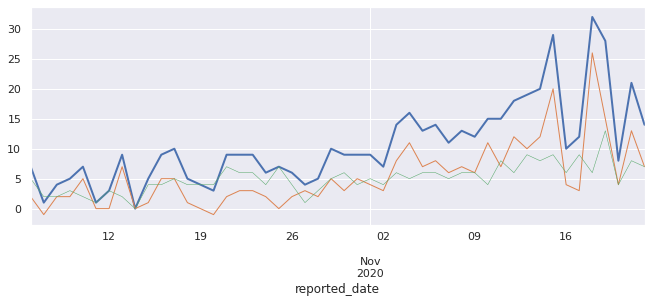

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
case_status['delta_deaths'].plot(linewidth=2);
case_status['delta_ltc_deaths'].plot(linewidth=1);
case_status['delta_non_ltc_deaths'].plot(linewidth=0.5);